In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/NFLX (2).csv")

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [9]:
df.shape

(1009, 7)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       952 non-null    float64
 1   High       952 non-null    float64
 2   Low        952 non-null    float64
 3   Close      952 non-null    float64
 4   Adj Close  952 non-null    float64
 5   Volume     952 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 52.1 KB


In [13]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### Finding outliers

In [28]:
cols = df.columns
cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
df = df.drop(["Date"], axis=1)

In [76]:
df

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1001,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1003,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


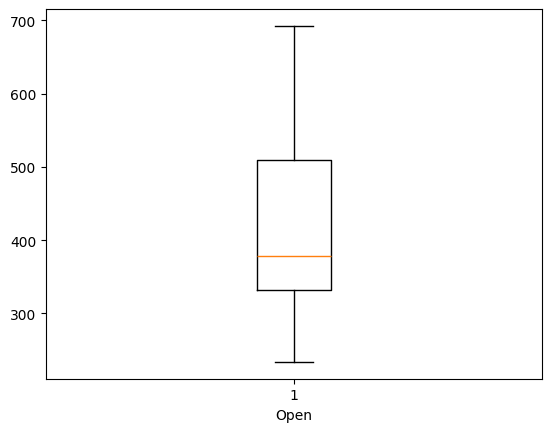

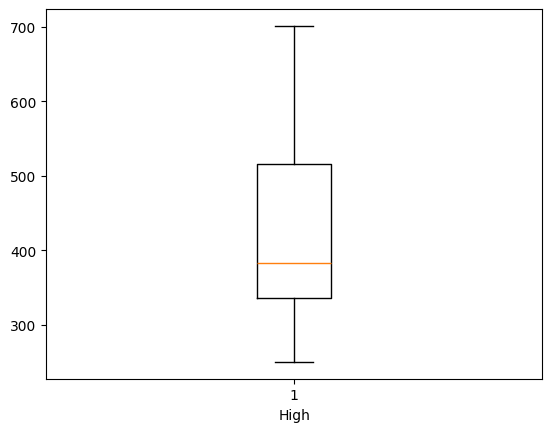

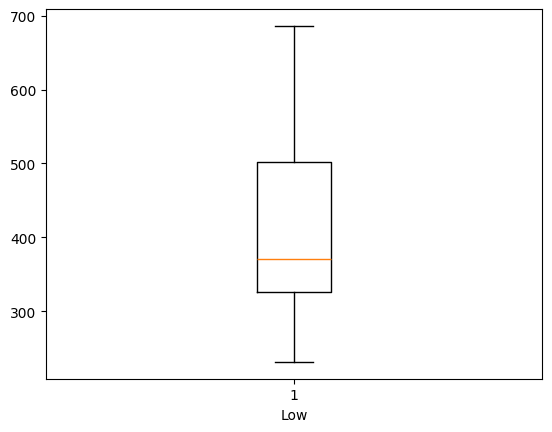

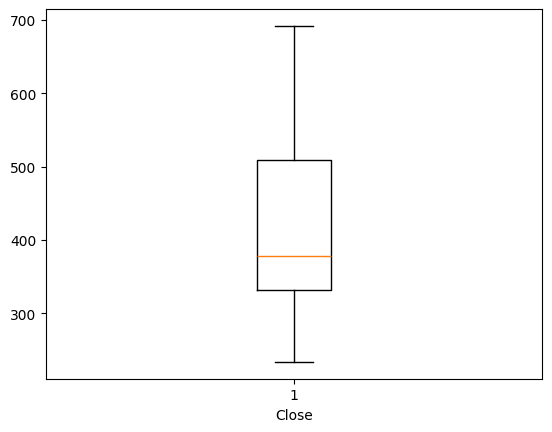

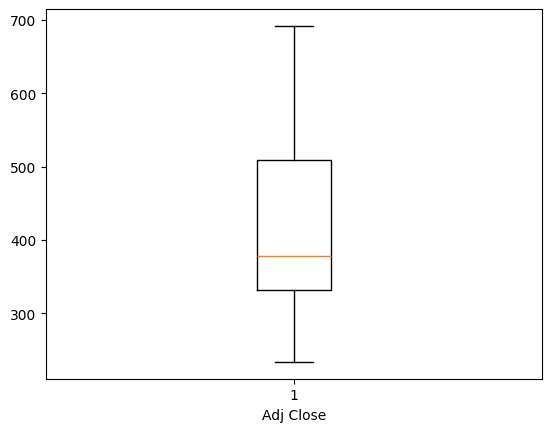

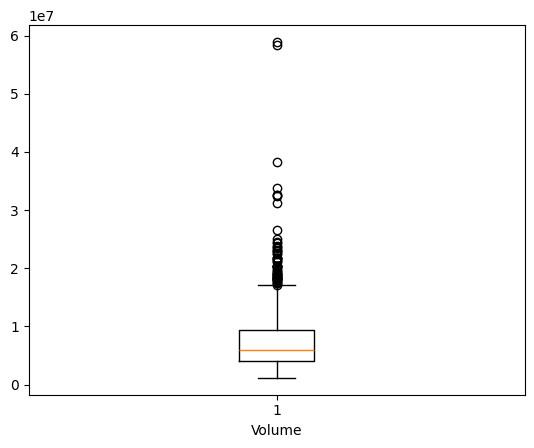

In [29]:
for i in cols:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()


In [30]:
cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

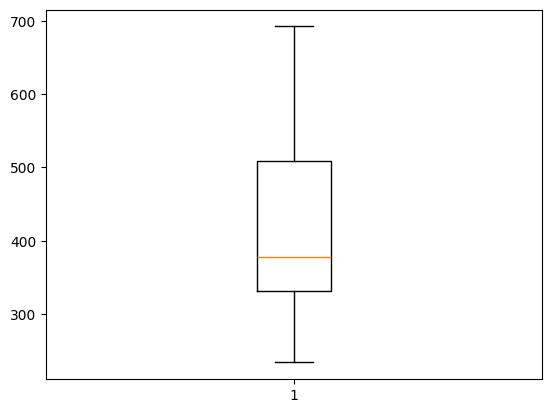

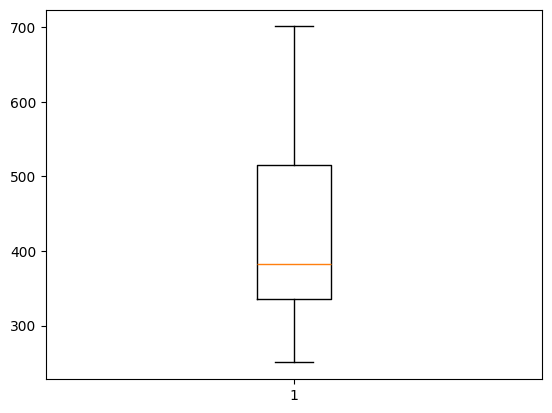

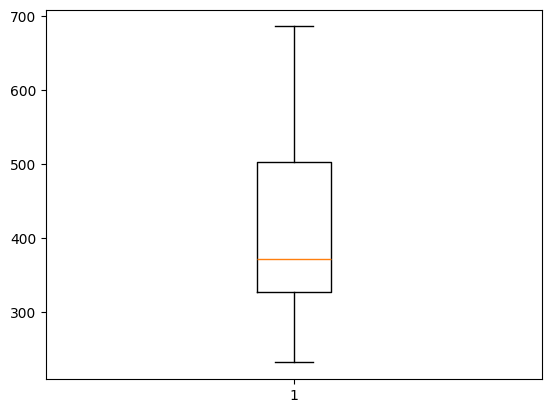

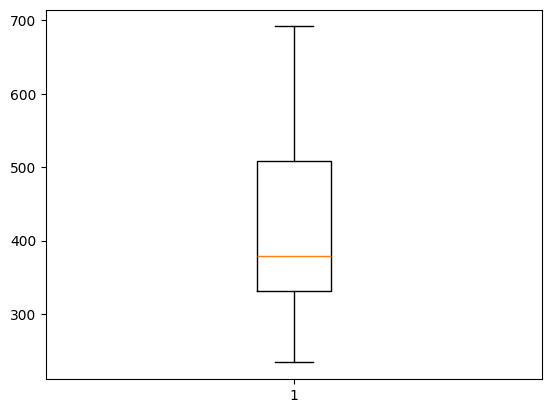

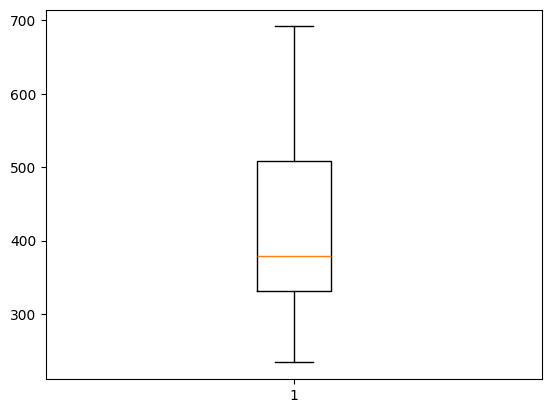

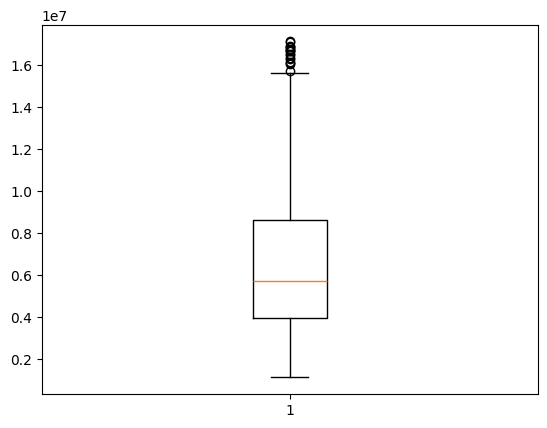

In [31]:
for i in cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  df = df[(df[i] >= lower) & (df[i] <= upper)]
  plt.boxplot(df[i])
  plt.show()

In [77]:
numcols = df.select_dtypes(include=["number"])
numcols.head()

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [80]:
corrMat = numcols.corr()
corrMat

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998855,0.998757,0.997352,0.997352,-0.559355
High,0.998855,1.000000,0.998594,0.998724,0.998724,-0.546422
Low,0.998757,0.998594,1.000000,0.998858,0.998858,-0.571564
Close,0.997352,0.998724,0.998858,1.000000,1.000000,-0.558621
Adj Close,0.997352,0.998724,0.998858,1.000000,1.000000,-0.558621
Volume,-0.559355,-0.546422,-0.571564,-0.558621,-0.558621,1.000000


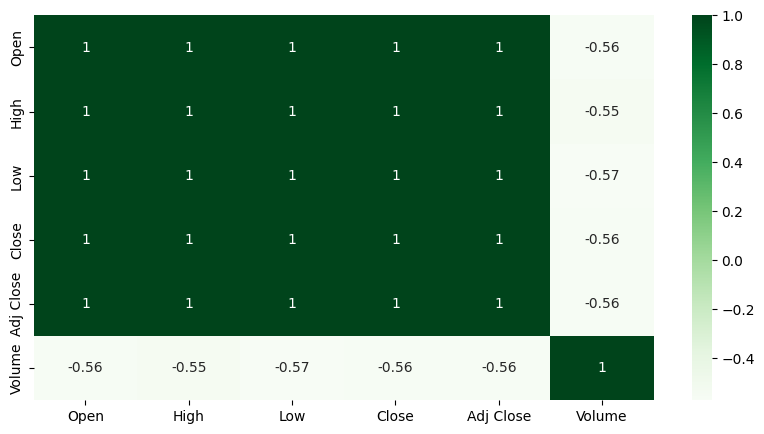

In [89]:
plt.figure(figsize = (10,5))
sns.heatmap(corrMat, annot = True, cmap = 'Greens')
plt.show()

In [58]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']


In [59]:
y

,Adj Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
1001,359.700012
1003,384.359985
1006,429.480011
1007,405.600006


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [61]:
X_train

,Open,High,Low,Close,Volume
352,373.500000,376.660004,372.000000,374.600006,4992600
589,421.649994,434.730011,420.309998,434.049988,6797000
601,458.859985,467.010010,454.000000,465.910004,4134500
123,335.869995,344.410004,334.019989,338.380005,7790500
84,367.779999,369.679993,363.329987,367.450012,7712300
...,...,...,...,...,...
119,358.190002,365.540009,356.630005,363.089996,6993700
304,375.450012,384.799988,374.709991,381.890015,10089800
912,586.789978,591.530029,568.080017,575.429993,3732200
474,337.760010,337.950012,331.019989,333.100006,5765300


In [62]:
X_test

,Open,High,Low,Close,Volume
224,233.919998,254.500000,231.229996,253.669998,14402700
459,314.390015,314.390015,303.750000,309.989990,6218800
745,582.450012,588.750000,570.400024,579.840027,11802100
801,557.000000,559.750000,550.299988,553.729980,2720300
549,371.309998,400.510010,367.700012,396.720001,11692900
...,...,...,...,...,...
38,291.940002,292.869995,275.049988,280.290009,13405800
34,309.359985,321.029999,302.000000,320.350006,11988300
762,557.289978,563.630005,552.729980,557.280029,2624100
333,345.000000,353.609985,343.250000,353.399994,7891600


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
y_pred

array([253.669998, 309.98999 , 579.840027, 553.72998 , 396.720001,
       531.789978, 517.570007, 454.190002, 614.090027, 290.059998,
       321.98999 , 520.549988, 329.600006, 503.859985, 590.650024,
       365.799988, 360.299988, 309.380005, 355.209991, 302.570007,
       373.690002, 349.920013, 338.619995, 381.049988, 321.549988,
       268.149994, 431.820007, 539.849976, 510.299988, 300.940002,
       508.049988, 527.51001 , 268.029999, 347.73999 , 331.619995,
       355.929993, 582.070007, 364.559998, 679.330017, 502.899994,
       298.070007, 317.940002, 503.059998, 304.320007, 416.76001 ,
       302.600006, 335.660004, 367.880005, 351.290009, 309.100006,
       336.630005, 418.970001, 364.369995, 285.529999, 482.350006,
       368.769989, 355.059998, 368.970001, 531.049988, 367.649994,
       677.719971, 674.049988, 610.340027, 546.98999 , 233.880005,
       328.190002, 494.660004, 549.219971, 477.579987, 365.209991,
       443.399994, 343.160004, 399.390015, 513.469971, 530.789

In [68]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [69]:
rSquaredError = r2_score(y_test, y_pred)

In [70]:
rSquaredError

1.0

In [71]:
root_mean_squared_error(y_test, y_pred)

1.6894806636162912e-13

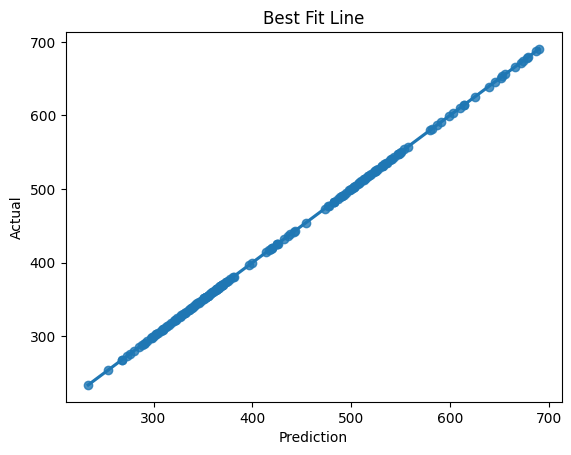

In [72]:
### Best Fit

sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Best Fit Line')
plt.show()

In [90]:
model.coef_

array([ 1.19179813e-14, -1.36132628e-14,  2.63141432e-15,  1.00000000e+00,
        4.74338450e-20])

In [91]:
model.intercept_

np.float64(-1.0231815394945443e-12)

In [92]:
### Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [96]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

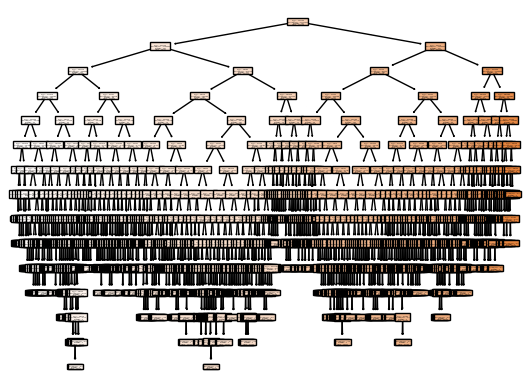

In [97]:
from sklearn import tree
final_tree=tree.plot_tree(dec_tree, filled=True)

In [98]:
dec_tree.get_depth()

14

In [100]:
Y_pred = dec_tree.predict(X_test)
Y_pred

array([255.570007, 310.100006, 575.429993, 553.409973, 395.420013,
       532.280029, 517.919983, 453.720001, 612.690002, 290.390015,
       321.160004, 520.650024, 330.299988, 503.839996, 590.530029,
       366.230011, 360.089996, 307.630005, 355.809998, 302.799988,
       374.600006, 349.600006, 338.690002, 381.      , 321.160004,
       267.660004, 434.480011, 539.809998, 510.399994, 299.109985,
       508.890015, 526.27002 , 267.660004, 347.570007, 330.75    ,
       355.709991, 583.849976, 364.970001, 681.169983, 502.809998,
       298.600006, 317.5     , 503.179993, 304.209991, 413.549988,
       302.799988, 335.660004, 367.720001, 351.269989, 309.25    ,
       336.899994, 418.649994, 364.230011, 286.130005, 481.329987,
       368.700012, 354.609985, 368.700012, 530.76001 , 367.720001,
       681.169983, 681.169983, 610.710022, 546.880005, 249.470001,
       327.769989, 494.73999 , 550.119995, 476.890015, 364.970001,
       440.519989, 343.089996, 398.390015, 513.76001 , 530.309

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Y_pred = dec_tree.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
mae = mean_absolute_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-square : r2", r2)

Mean Squared Error (MSE): 2.4364664900478767
Mean Absolute Error (MAE): 0.6945031465968557
R-square : r2 0.9998043119959525


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [111]:
Y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, Y_pred_rf)
mae = mean_absolute_error(y_test, Y_pred_rf)
r2 = r2_score(y_test, Y_pred_rf)

print("Random Forest Regressor Performance:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Random Forest Regressor Performance:
Mean Squared Error (MSE): 3.773541448841398
Mean Absolute Error (MAE): 0.7786509534031426
R² Score: 0.9996969230657059


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [121]:
import shutil

src = "/content/drive/MyDrive/Linear-Regression_&_Random-Forest-Handson-15-06-2025.ipynb"
dest = "/content/Data_Science_-_AI_ML/Linear-Regression_&_Random-Forest-Handson-15-06-2025.ipynb"

shutil.copy(src, dest)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Linear-Regression_&_Random-Forest-Handson-15-06-2025.ipynb'